<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/cda-2021/blob/main/notebooks/cda_2021_04_13_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correspondence analysis in R

In [4]:
install.packages("ca")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Load `ca` package to use correspondence analysis in R

In [5]:
library(ca)

We will create data for our exercise

In [7]:
dane <- c(1933, 1175, 1186,
          646, 579, 671,
          707, 780, 767,
          768, 962, 1126)

N <- matrix(dane, ncol = 3, byrow = TRUE)
rownames(N) <- c("rural","c20","c20_100","c100")
colnames(N) <- c("realized","refused","errors")

addmargins(N)

,realized,refused,errors,Sum
rural,1933,1175,1186,4294
c20,646,579,671,1896
c20_100,707,780,767,2254
c100,768,962,1126,2856
Sum,4054,3496,3750,11300


In [15]:
4294/11300

[1] 0.38

Let's see proportions using `prop.table` function.

In [11]:
prop.table(N) ## p 
prop.table(N, margin = 1) ## row percentage
prop.table(N, margin = 2) ## col percentage

,realized,refused,errors
rural,0.17106195,0.10398230,0.10495575
c20,0.05716814,0.05123894,0.05938053
c20_100,0.06256637,0.06902655,0.06787611
c100,0.06796460,0.08513274,0.09964602


,realized,refused,errors
rural,0.4501630,0.2736376,0.2761993
c20,0.3407173,0.3053797,0.3539030
c20_100,0.3136646,0.3460515,0.3402839
c100,0.2689076,0.3368347,0.3942577


,realized,refused,errors
rural,0.4768130,0.3360984,0.3162667
c20,0.1593488,0.1656178,0.1789333
c20_100,0.1743957,0.2231121,0.2045333
c100,0.1894425,0.2751716,0.3002667


What are the steps in correspondence analysis?

1. Calculate $\chi^2$ statistic to verify whether there is a relationship in our data.
2. Conduct correspondence analysis (using `ca()` function).

In [12]:
chisq.test(N)


	Pearson's Chi-squared test

data:  N
X-squared = 290.2, df = 6, p-value < 2.2e-16


There are three outputs from `ca` function:

+ if we use `result` then we will get standard (simplified) output,
+ if we use `summary(result)` then we will get detailed output (i.e. more information that will be useful to understand results),
+ if we use `plot(results)` then we will get a scatter plot which is often named a **perception map**.

In [14]:
results <- ca(N)
results


 Principal inertias (eigenvalues):
           1       2       
Value      0.02502 0.000662
Percentage 97.42%  2.58%   


 Rows:
            rural       c20  c20_100      c100
Mass     0.380000  0.167788 0.199469  0.252743
ChiDist  0.191706  0.049230 0.101139  0.191503
Inertia  0.013965  0.000407 0.002040  0.009269
Dim. 1  -1.211908  0.260156 0.561935  1.205908
Dim. 2  -0.080827 -1.050377 1.875721 -0.661515


 Columns:
         realized  refused    errors
Mass     0.358761 0.309381  0.331858
ChiDist  0.209989 0.099462  0.143158
Inertia  0.015820 0.003061  0.006801
Dim. 1  -1.327312 0.587780  0.886945
Dim. 2  -0.160041 1.373601 -1.107548

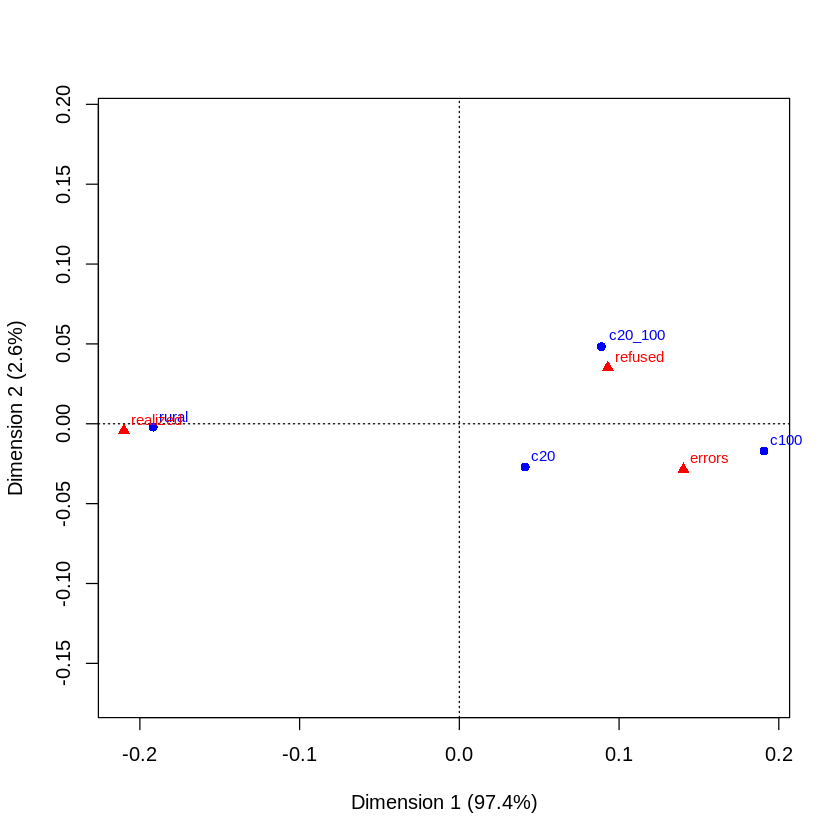

In [16]:
plot(results)

How many dimensions will be extrated? We calcuate this based on the following formula:

$$
\min\{R - 1, C-1\},
$$

where $R$ denotes number of rows in a table and $C$ denotes number of columns in a table.

In [17]:
summary(results)


Principal inertias (eigenvalues):

 dim    value      %   cum%   scree plot               
 1      0.025020  97.4  97.4  ************************ 
 2      0.000662   2.6 100.0  *                        
        -------- -----                                 
 Total: 0.025681 100.0                                 


Rows:
    name   mass  qlt  inr    k=1  cor ctr    k=2 cor ctr  
1 | rurl |  380 1000  544 | -192 1000 558 |   -2   0   2 |
2 |  c20 |  168 1000   16 |   41  699  11 |  -27 301 185 |
3 | c20_ |  199 1000   79 |   89  772  63 |   48 228 702 |
4 | c100 |  253 1000  361 |  191  992 368 |  -17   8 111 |

Columns:
    name   mass  qlt  inr    k=1  cor ctr    k=2 cor ctr  
1 | rlzd |  359 1000  616 | -210 1000 632 |   -4   0   9 |
2 | rfsd |  309 1000  119 |   93  874 107 |   35 126 584 |
3 | errr |  332 1000  265 |  140  960 261 |  -28  40 407 |